![5.2.1](img/5.2.1.png)

In [13]:
from sympy import *
l = 9 *12       # feet to inch
ab = 6 *12
bc = l-ab
B = 4
b = 1
H = 3
h = 1
p = symbols("p")
st = 6000   # pound/inch^2
sc = 10000
#--------------------
E, I = symbols('E, I')
R1, R2 = symbols('R1, R2')
from sympy.physics.continuum_mechanics.beam import Beam
bm = Beam(l, E, I)
bm.apply_load(R1, 0, -1)
bm.apply_load(p, l, -1)
bm.apply_load(R2, ab, -1)
# find reaction load at A, B
bm.bc_deflection = [(0, 0), (ab, 0)]
bm.solve_for_reaction_loads(R1, R2)
print(bm.reaction_loads)
# reverse dir
R1,R2 = ( -x for x in bm.reaction_loads.values())
R1,R2

{R1: p/2, R2: -3*p/2}


(-p/2, 3*p/2)

In [14]:
# y-centroid = sum(Ay)/sum(A)
ct = ( (0.5*h)*B*h + (h+0.5*H)*b*H )/(B*h + b*H)
cb = ( (0.5*H)*b*H + (H+0.5*h)*B*h )/(B*h + b*H)
ct, cb

(1.3571428571428572, 2.642857142857143)

In [15]:
# inertia = sum((b/3)[yt^3+yb^3])
i = (B/3)*(ct**3 -(ct-h)**3) + (b/3)*(cb**3 + (H-cb)**3)
i

9.44047619047619

In [16]:
# modulus section
zt = i/ct
zb = i/cb
zt, zb

(6.956140350877192, 3.572072072072072)

In [26]:
# max moment at B
m = -R1*ab
print(f"max moment={m}")

max moment=36*p


P-compress=992.242242242242
P-tension=1159.35672514620
use min=992.242 pound


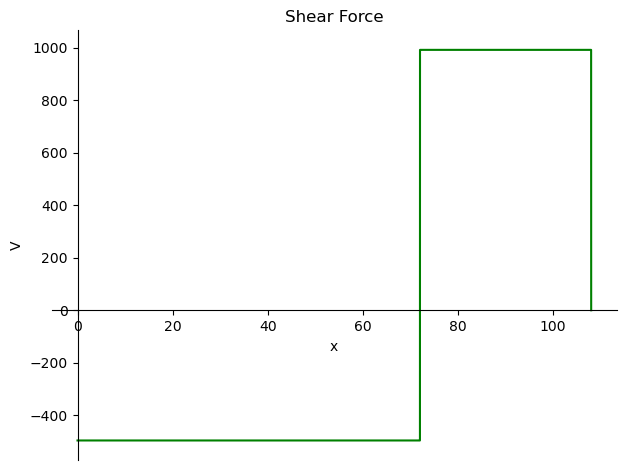

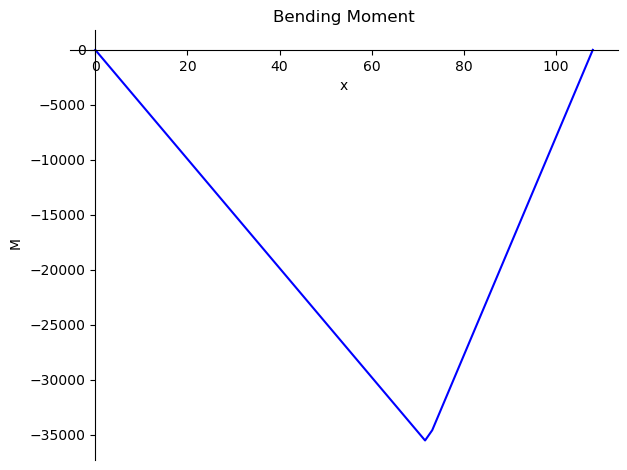

In [29]:
# sigma = m/z
# max_mc = sc*zb
# max_mt = st*zt
pc,*_ = solve(Eq(m,sc*zb),p)
print(f"P-compress={pc}")
pt,*_ = solve(Eq(m,st*zt),p)
print(f"P-tension={pt}")
vp = min(pc,pt)
print(f"use min={vp:.3f} pound")
bm.plot_shear_force(subs={p:vp})  
bm.plot_bending_moment(subs={p:vp})